# **Cynthia Kielpinski**

### Research Interests:

- By majoring in statistics, I have always had a passion for the process behind statistics. The collection of data, the wrangling and processing of the data, exploratory analysis of the data, interpreting the analysis, and then finalizing the process by formulating a conclusion from the analysis. One fundamental ideal in statistics I have learned is that without an interdiscplinary field, you do not have the data and you are simply performing pure statistics. As per this comment, I have never found interest in pure statistics thus I found a passion in the interdisciplinary field of ecology and environmental sciences. For this project, my research interests are focus on exploratory statistics (required) and an environmental or ecological factor. Environmental data is more prominent  than ecological from my persepctive thus I have decided to focus on an environmental influence. Since our group decided on using a summer and winter Olympics dataset, I though to refine my first research question to involve different countries performance in the summer and winter olympics influenced by their "local" climate. Competition is always a profound topic, and additionally if there is need for an additional research question I was also interested in how countries perform in their home country versus a visiting country. 

### Research Question(s): (updated: 03-22-2023)

1. **Does the annual average temperature of a country determine a correlation between the probability or likelihood of preforming more successfully in the summer or winter Olympics in individual disciplines? Or is a countries success determined by the average GDP of a country?** 

     For example, does Canada have a better probability of winning medals in the winter Olympics since it is considered to be a cold climate according to my Bernoulli distribution? Does Brazil have a better probability of winning medals in the summer Olympics since it is in the hot designation? Or is there no correlation between a countries climate classification and which Olympics the country preforms better in? I will explore the correlations between countries and their climates in regards to number of medals won in each of the respective summer or winter Olympic events. Overall, to answer this research question, my main form of analysis will be linear regression using quantitative variables such as total point values, and counts for the three unique medal types. My additional research question is too look at if climate has no influence on a countries success, if the average gross domestic product has an influence on a countries success.
 
    My first attempt to complete this analysis was to use a Bernoulli distribution as the designation for "hot" (1) and "cold" (0) climates. I used the annual temperature column to calculate the overall average annual temperature for all the countries in the dataset to determine a "threshold" for determining if a country is "hot" and "cold" by using a Bernoulli distribution. However, later on in my EDA I had decided to only analyse the top 15 winning countries for simplistic reasons. In doing as such, I had discovered the proportion of "hot" to "cold" countries was very skewed and I had decided using the average annual temperature would be a more appropriate approach.

### Exploratory Data Analysis Plan: (updated: 03-01-2023)

- To determine some answers into starting to answer my research question, I will use descriptive and exploratory techniques such as... Some of my ideas for more advanced analyses are: multiple linear regression analysis, and potentially using principal component analysis. From briefly looking over the datasets, the above methods are a brief thought to the possibilities when exploring the data. After wrangling the data, I will define the specific analyses methods I choose to use. I have a background in Statistics, thus deciding what analyses will be used at a later stage will be an simplistic decision. 

- I will complete as little wrangling as needed, but I have visioned the data to be cleaner and more orderly without taking hours on wrangining. I think my current plan is to edit/wrangle each dataset, and then merge all of the separate datasets together so I have one uniform dataset to work with. I will change some column names for ease of analyses, and try to keep everything simplistic. Some columns I am thinking of adding as of now are: total number of medals won, total number of gold, silver and bronze medals won, and maybe dome column for a way to rank the total number of "points" won to easily compute standings.

---

<h3 align="center">DATA ANALYSIS PIPELINE:</h3> 

---

<h3 align="left"> Load, Clean, Process, and Wrangle Data:</h3>

---

### Import Packages: (all packages needed for analysis, updated: 03--2023)

In [2]:
## IMPORT LIBRARIES:

import sys
sys.path.append("../code")
import project_functions_cynthia as pf

In [3]:
## IMPORT PACKAGES:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import rc
# import matplotlib.colors as mcolors
# import seaborn as sns


## SET THEME FOR SEABORN:
pf.sns.set_theme(style="ticks")

In [4]:
## DATA UPLOAD:
OlympicHost = pf.pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")

OlympicMedals = pf.pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")

GDPCountry = pf.pd.read_csv("../../data/raw/GDPbyCountry.csv")

HistTemp = pf.pd.read_csv("../../data/raw/HistoricalTemperatureData.csv")

---

#### **Notes:** About the Historical Temperature Data and the GDP Datasets

- The following links are from the World Bank Website which has the following license as described below. 

- [Historical Average Temperature Data per Country](https://datacatalog.worldbank.org/search/dataset/00402760) (For whatever reason, this link no longer exists?!?! I have no idea why??)

- [Gross Domestic Product Data:](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

- By looking into the licenses for the data from the [World Bank Website](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets) it quotes that the license "[u]nless specifically labeled otherwise, these Datasets are provided to you under a Creative Commons Attribution 4.0 International License (CC BY 4.0), with the additional terms below."


---

## Initial Edits and Observations: 

In [5]:
## OLYMPIC HOST DATASET:
## Method Chaining: Drop columns not needed for analysis
OlympicHost1 = OlympicHost.drop(columns=["game_end_date", "game_start_date"])

In [6]:
## OLYMPIC MEDALS DATASET:
## Method Chaining: Drop columns, rename columns
OlympicMedals = OlympicMedals.drop(columns=["athlete_url", "athlete_full_name","participant_title","country_code"]).rename(columns={"discipline_title": "discipline", "slug_game": "game_slug","event_title": "event","event_gender": "event_sex",
                             "medal_type": "medal_type","participant_type": "participant_type","country_name": "country","country_3_letter_code": "country_code"})

In [7]:
## OLYMPIC MEDALS DATASET:
## Select Only "Athlete" Events: see note at bottom of chunk for reasoning.
OlympicMedals = OlympicMedals[OlympicMedals["participant_type"] == "Athlete"]

## Establish Point Values:
point_value = []
for row in OlympicMedals["medal_type"]:
        if row == "GOLD" :    point_value.append(3)
        elif row == "SILVER" :  point_value.append(2)
        else:           point_value.append(1)

## Adds the New Column: "point_value"
OlympicMedals["point_value"] = point_value

## Cleaned Data into New Data Frame:
OlympicMedals1 = OlympicMedals

## NOTE: I have decided to select only "Athlete" events, due to the complexity of calculating point totals for "Team Game" events...
## Overall, I am more interested in individual athlete events, thus this refines my research question to be more specific.

In [8]:
## HISTORICAL TEMPERATURE DATASET:
## Method Chaining: Rename columns, drop columns

HistTemp = HistTemp.rename(columns = {"ISO_3DIGIT": "WRONG_country_code", "Jan_Temp": "Jan_temp", 
                                      "Apr_Temp": "Apr_temp", "Jun_Temp": "Jun_temp", "July_Temp":"July_temp",
                                      "Aug_Temp": "Aug_temp", "Nov_Temp": "Nov_temp"}).drop(columns=["WRONG_country_code",
                                        "Jan_temp", "Feb_temp", "Mar_temp", "Apr_temp","May_temp", "Jun_temp","July_temp",
                                        "Aug_temp", "Sept_temp", "Oct_temp","Nov_temp", "Dec_temp"])

## NOTE: I probably did not have to rename, however I didn't know if I would keep columns or not...

In [9]:
## HISTORICAL TEMPERATURE DATASET:

## Average Annual Temperature for All Countries:
MeanTemp = HistTemp[["Annual_temp"]].mean() ## Value: 17.563804 Degrees Celsius

## Categorical Variable to Define: (1: Hot, 0: Cold)
## Used to determine relationship with climate/temperature:
hot_cold = []
for row in HistTemp["Annual_temp"]:
        if row > 17.5638 :    hot_cold.append(1)
        else:           hot_cold.append(0)
        
HistTemp["hot_cold"] = hot_cold

## Cleaned Data into New Data Frame:
HistTemp1 = HistTemp

## NOTE: I didn't actually end up using this system, but decided to leave the code.
## It was easier to just use the average annual temperature.

In [10]:
## GROSS DOMESTIC PRODUCT (GDP) DATASET:
## Method Chaining: Drop columns, rename columns
GDPCountry = GDPCountry.drop([0,1,2,3]).drop(columns=["Unnamed: 3"]).rename(columns = {"Data Source": "country",
                                            "World Development Indicators": "country_code", "Unnamed: 2": "GDP", 
                                            "Unnamed: 4": "1960", "Unnamed: 5": "1961", "Unnamed: 6": "1962",
                                            "Unnamed: 7": "1963", "Unnamed: 8": "1964", "Unnamed: 9": "1965",
                                            "Unnamed: 10": "1966","Unnamed: 11": "1967", "Unnamed: 12": "1968", 
                                            "Unnamed: 13": "1969", "Unnamed: 14": "1970","Unnamed: 15": "1971",
                                            "Unnamed: 16": "1972","Unnamed: 17": "1973","Unnamed: 18": "1974",
                                            "Unnamed: 19": "1975","Unnamed: 20": "1976","Unnamed: 21": "1977",
                                            "Unnamed: 22": "1978","Unnamed: 23": "1979","Unnamed: 24": "1980",
                                            "Unnamed: 25": "1981","Unnamed: 26": "1982","Unnamed: 27": "1983",
                                            "Unnamed: 28": "1984","Unnamed: 29": "1985","Unnamed: 30": "1986",
                                            "Unnamed: 31": "1987","Unnamed: 32": "1988","Unnamed: 33": "1989",
                                            "Unnamed: 34": "1990","Unnamed: 35": "1991","Unnamed: 36": "1992",
                                            "Unnamed: 37": "1993","Unnamed: 38": "1994","Unnamed: 39": "1995",
                                            "Unnamed: 40": "1996","Unnamed: 41": "1997","Unnamed: 42": "1998",
                                            "Unnamed: 43": "1999","Unnamed: 44": "2000","Unnamed: 45": "2001",
                                            "Unnamed: 46": "2002","Unnamed: 47": "2003","Unnamed: 48": "2004",
                                            "Unnamed: 49": "2005","Unnamed: 50": "2006","Unnamed: 51": "2007",
                                            "Unnamed: 52": "2008","Unnamed: 53": "2009","Unnamed: 54": "2010",
                                            "Unnamed: 55": "2011","Unnamed: 56": "2012","Unnamed: 57": "2013",
                                            "Unnamed: 58": "2014","Unnamed: 59": "2015","Unnamed: 60": "2016",
                                            "Unnamed: 61": "2017","Unnamed: 62": "2018","Unnamed: 63": "2019",
                                            "Unnamed: 64": "2020","Unnamed: 65": "2021"})

## NOTE: Using .dropna() after this method chain causes unwanted chaos...

In [11]:
## GROSS DOMESTIC PRODUCT (GDP) DATASET:
## Average GDP from 1960 to 2021: 
average_GDP = GDPCountry[["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                           "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983",
                        "1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994","1995",
                        "1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007",
                        "2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021"]].mean(axis=1)



## NOTE: skipna=TRUE, is default! So no need to remove the NaN values in above method chain.

GDPCountry["average_GDP"] = round(average_GDP,2)

## NOTE: Removing the NaN Values from the dataset had significant skrinkage. 
## However, the countries with NaN values anywhere present most likely are not in the top standings of the Olympics.

GDPCountry["average_GDP_ByTenBillion"] = round((average_GDP/10000000000),2)

In [12]:
## GROSS DOMESTIC PRODUCT (GDP) DATASET:
## Method Chaining: Drop columns
GDPCountry1 = GDPCountry.drop(columns=["GDP","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                       "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982",
                       "1983","1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994",
                       "1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015",
                       "2016","2017","2018","2019","2020","2021"])

In [13]:
## Merge Data Sets:
Olympic1 = pf.pd.merge(OlympicHost1, OlympicMedals1, on="game_slug")

In [14]:
## Winter Olympics: 
WinterOlympic = Olympic1[Olympic1["game_season"]== "Winter"]

## Summer Olympics:
SummerOlympic = Olympic1[Olympic1["game_season"]== "Summer"]

<h3 align="left"> Function: </h3>

In [15]:
## FUNCTIONS: Medal Counts Per Country
def medalCounts(df, medal_type):
    """
    The function denoted as "medalCounts" returns a dataframe with a series of parameters associated with a unique medal type. 
    Please refer to the parameters and returns section for more information.
    Please note, that if the medal type is spelt incorrectly, the function will not run.
    
    Parameters:
    -----------
    df: dataframe
        The dataframe to extract information from.
        
    medal_type: string
        The specific medal type of interest,
        
    Returns
    -------
        Returns a new dataframe which is subsetted to only contain the following parameters:
            - Country
            - Medal Type
            - Country Code
            - Specific Medal Type Count
    """
    
    dfmedal_count = df[df["medal_type"] == medal_type.upper()]
    
    dfmedal_count = (dfmedal_count.groupby(by=['country','medal_type', 'country_code'])[['game_year']].count()
     .rename(columns = {"medal_type":"Medal", "game_year" : medal_type+"_Medal_Count"})
     .sort_values(str(medal_type)+"_Medal_Count" , ascending=False)
     .reset_index())
     
    return dfmedal_count

## FUNCTION HELP: Double checking that my function's doc-string is operating correctly.
## help(medalCounts)

## EXAMPLE OF CODE BEFORE FUNCTION:

## WINTER: Number of Gold Per Country:  
## WinterGold = WinterOlympic[WinterOlympic["medal_type"]=="GOLD"]
## GoldPerCountry = WinterGold.groupby(by=['country','medal_type', 'country_code'])[['game_year']].count().reset_index()
## GoldPerCountry = GoldPerCountry.rename(columns = {"medal_type":"Medal", "game_year" : "Gold_Medal_Count"})
## GoldPerCountry = GoldPerCountry.sort_values("Gold_Medal_Count", ascending=False)
## TOPGoldPerCountry = GoldPerCountry[0:15]

In [16]:
## WINTER OLYMPICS:
## Medal Counts Per Country:
GoldPerCountry = medalCounts(WinterOlympic, "gold")
SilverPerCountry = medalCounts(WinterOlympic, "silver")
BronzePerCountry = medalCounts(WinterOlympic, "bronze")

## Medal Counts Per Country (Top 15 Performers):
TOPGoldPerCountry = GoldPerCountry[0:15]
TOPSilverPerCountry = SilverPerCountry[0:15]
TOPBronzePerCountry = BronzePerCountry[0:15]

## WINTER: Total Points by Country
TotalPointsCountry = WinterOlympic[["country", "point_value"]].groupby("country",as_index=False).sum()
TotalPointsCountry = TotalPointsCountry.sort_values("point_value", ascending=False)
TOPTotalPointsCountry = TotalPointsCountry[0:15]

In [17]:
## SUMMER OLYMPICS:
## Medal Counts Per Country:
GoldPerCountryS = medalCounts(SummerOlympic, "gold")
SilverPerCountryS = medalCounts(SummerOlympic, "silver")
BronzePerCountryS = medalCounts(SummerOlympic, "bronze")

## Medal Counts Per Country (Top 15 Performers):
TOPGoldPerCountryS = GoldPerCountry[0:15]
TOPSilverPerCountryS = SilverPerCountry[0:15]
TOPBronzePerCountryS = BronzePerCountry[0:15]

## WINTER: Total Points by Country
TotalPointsCountryS = SummerOlympic[["country", "point_value"]].groupby("country",as_index=False).sum()
TotalPointsCountryS = TotalPointsCountryS.sort_values("point_value", ascending=False)
TOPTotalPointsCountryS = TotalPointsCountryS[0:15]

---

<h3 align="left"> Exploratory Data Analysis: (updated: 03-04-2023)</h3>

---

#### **NOTE:** These EDA plots could be turned into function, dependent on time.

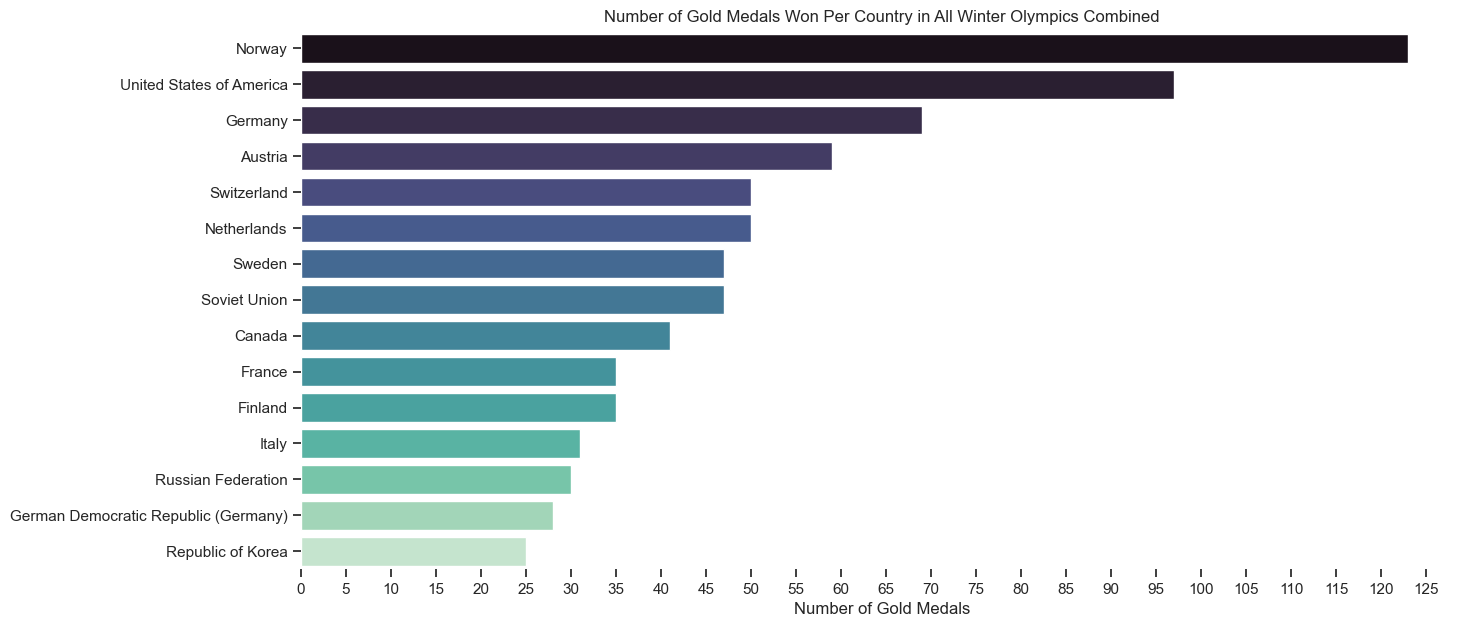

In [18]:
## WINTER: Number of Gold Medals per Country

## Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPGoldPerCountry, y="country", x="gold_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPGoldPerCountry['gold_Medal_Count'])+5,5))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Gold Medals Won Per Country in All Winter Olympics Combined")
pf.plt.xlabel("Number of Gold Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

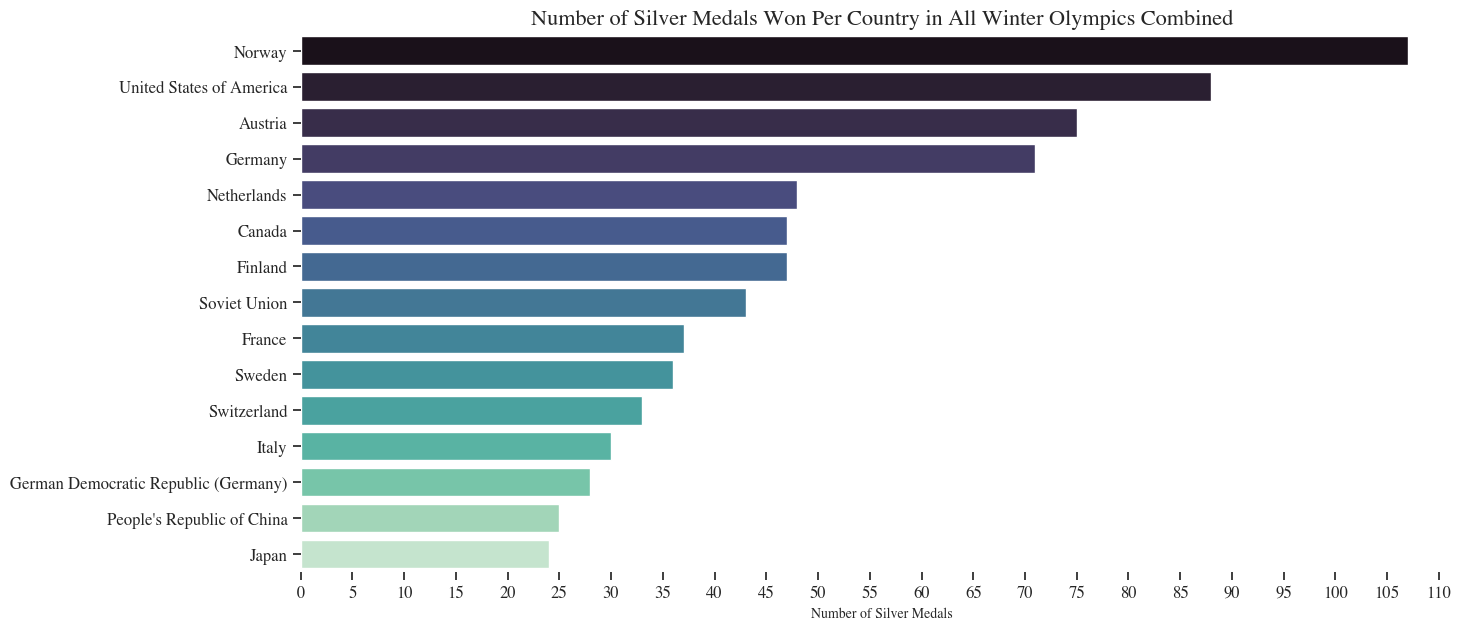

In [19]:
## WINTER: Number of Silver Medals per Country

## Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPSilverPerCountry, y="country", x="silver_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPSilverPerCountry['silver_Medal_Count'])+5,5))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Silver Medals Won Per Country in All Winter Olympics Combined")
pf.plt.xlabel("Number of Silver Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

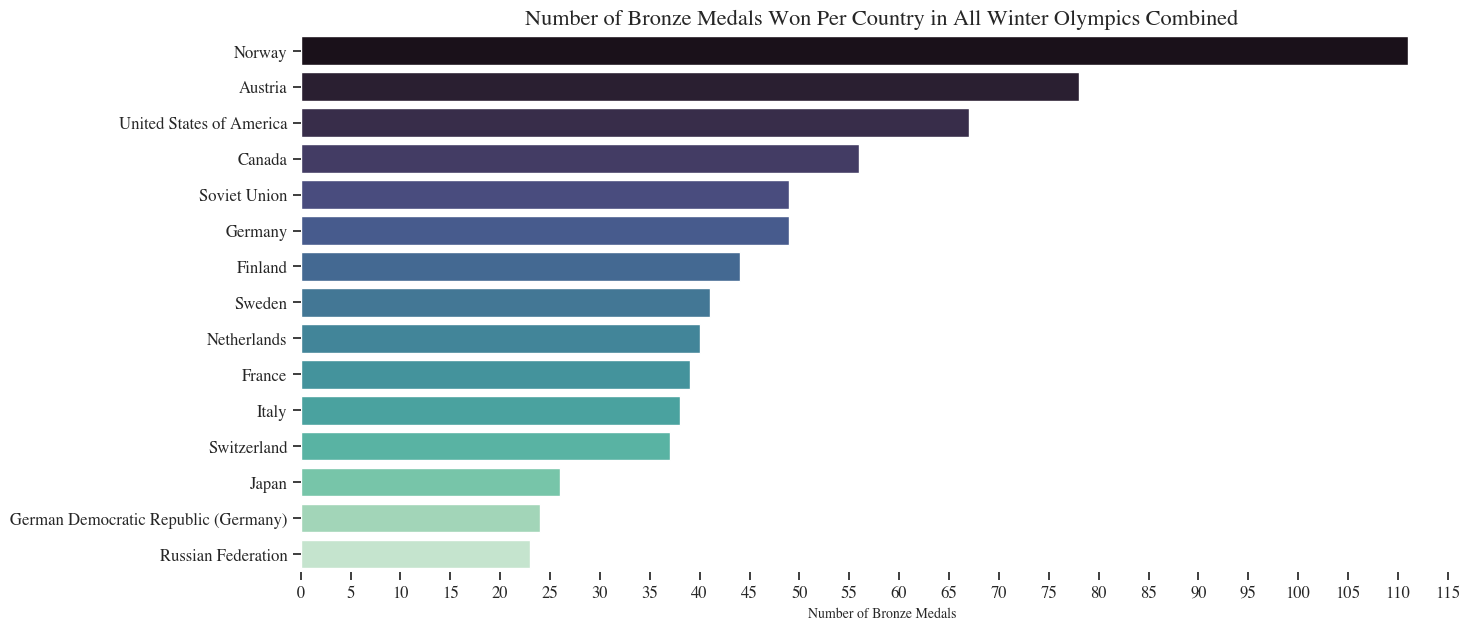

In [20]:
## WINTER: Number of Bronze Medals per Country

## Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPBronzePerCountry, y="country", x="bronze_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPBronzePerCountry['bronze_Medal_Count'])+5,5))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Bronze Medals Won Per Country in All Winter Olympics Combined")
pf.plt.xlabel("Number of Bronze Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

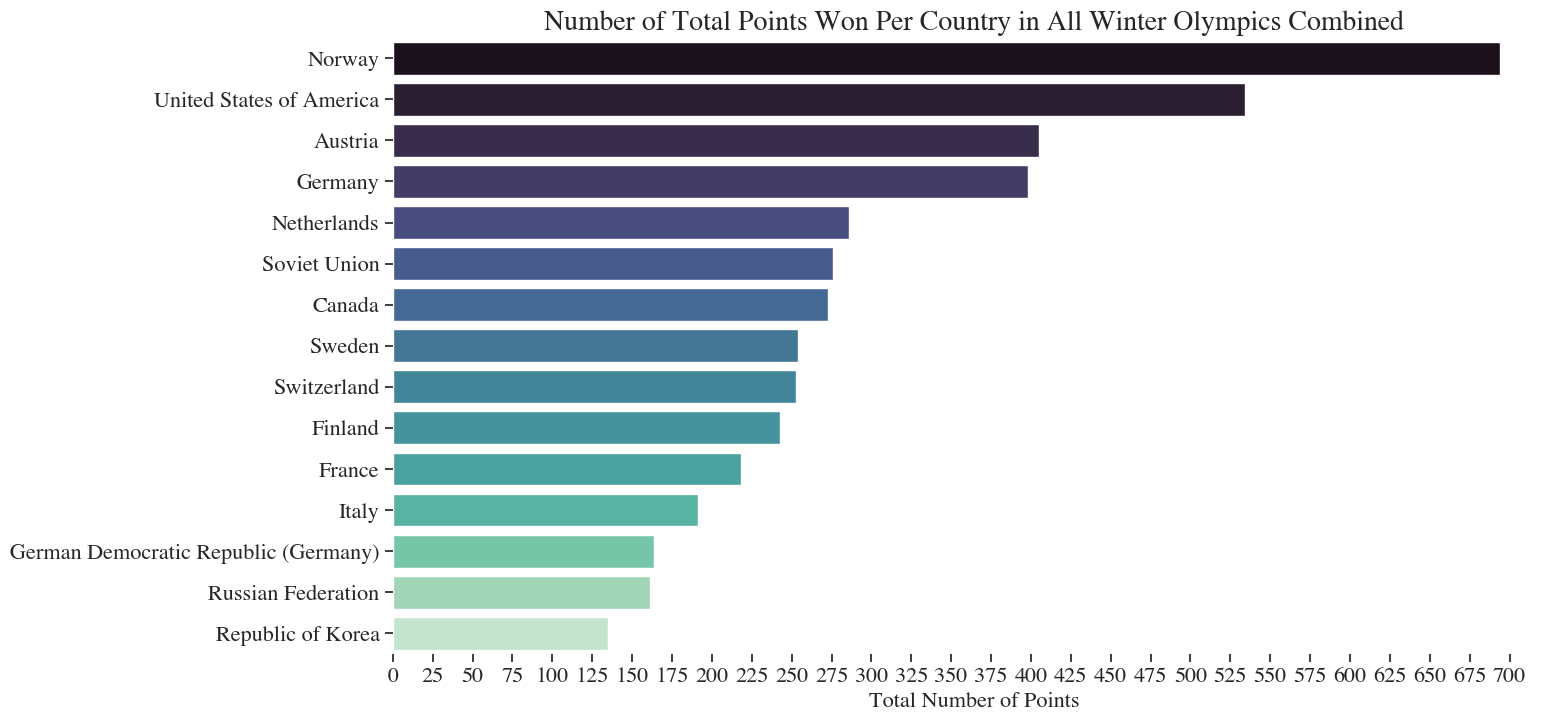

In [68]:
## WINTER: Number of Total Points per Country

## Actual Plot:
pf.plt.figure(figsize=(15,8))
pf.sns.barplot(TOPTotalPointsCountry, y="country", x="point_value",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPTotalPointsCountry['point_value'])+25,25))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Total Points Won Per Country in All Winter Olympics Combined")
pf.plt.xlabel("Total Number of Points")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
pf.plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

pf.plt.savefig("../../images/cynthia_figures/winterEDA.png", bbox_inches='tight', dpi=100)
None

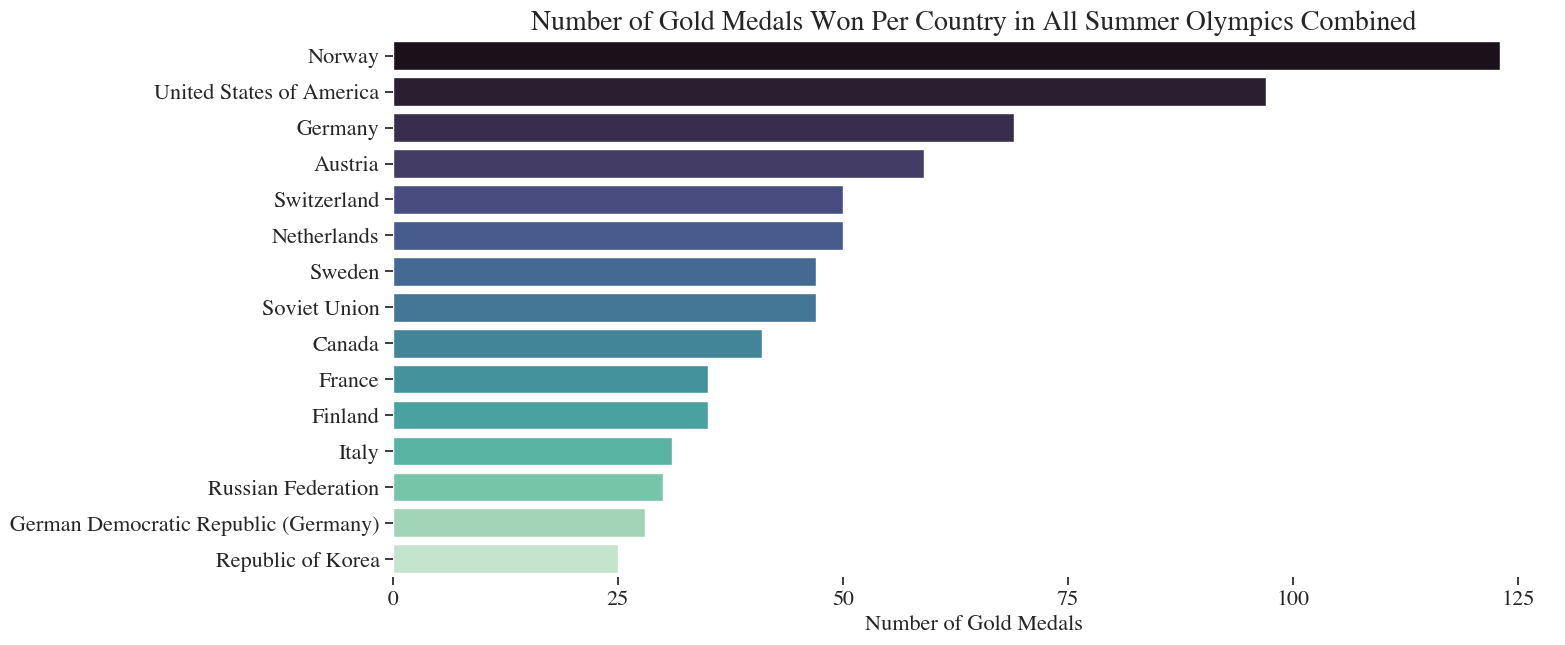

In [22]:
## SUMMER: Number of Gold Medals per Country

### Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPGoldPerCountryS, y="country", x="gold_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPGoldPerCountryS['gold_Medal_Count'])+5,25))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Gold Medals Won Per Country in All Summer Olympics Combined")
pf.plt.xlabel("Number of Gold Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

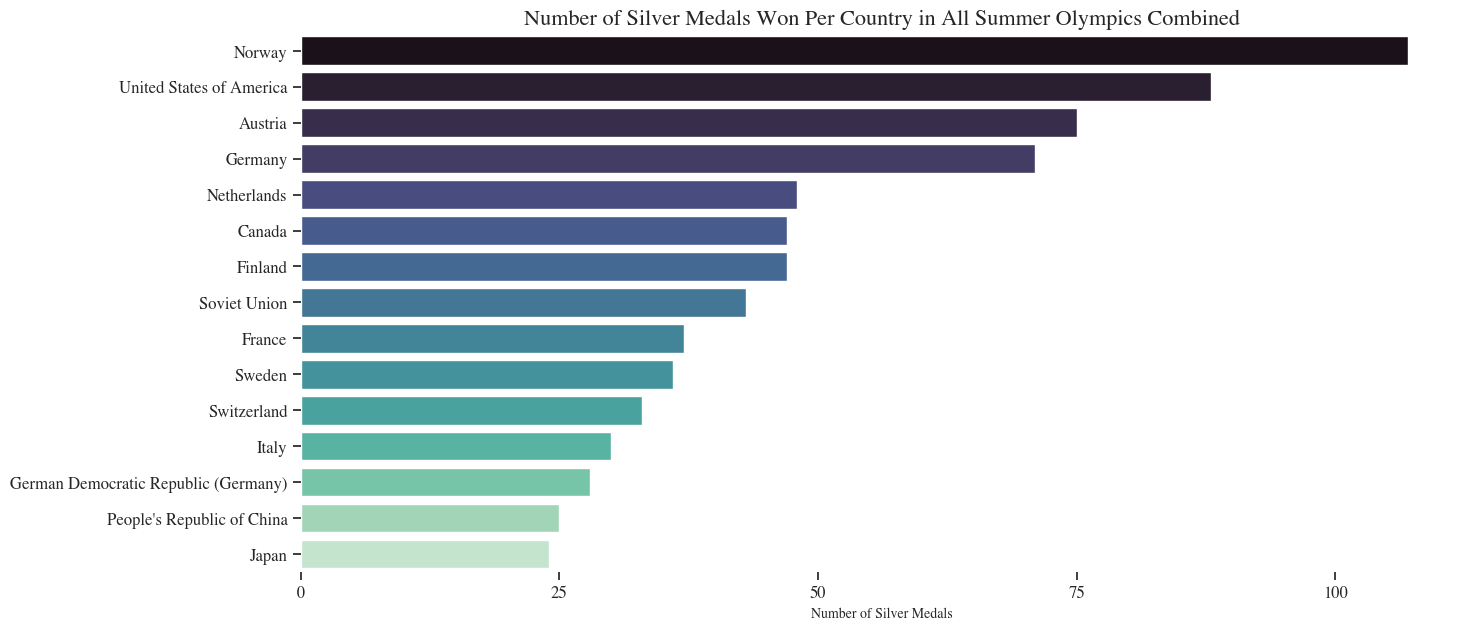

In [23]:
## SUMMER: Number of Silver Medals per Country

### Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPSilverPerCountryS, y="country", x="silver_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPSilverPerCountryS['silver_Medal_Count'])+5,25))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Silver Medals Won Per Country in All Summer Olympics Combined")
pf.plt.xlabel("Number of Silver Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

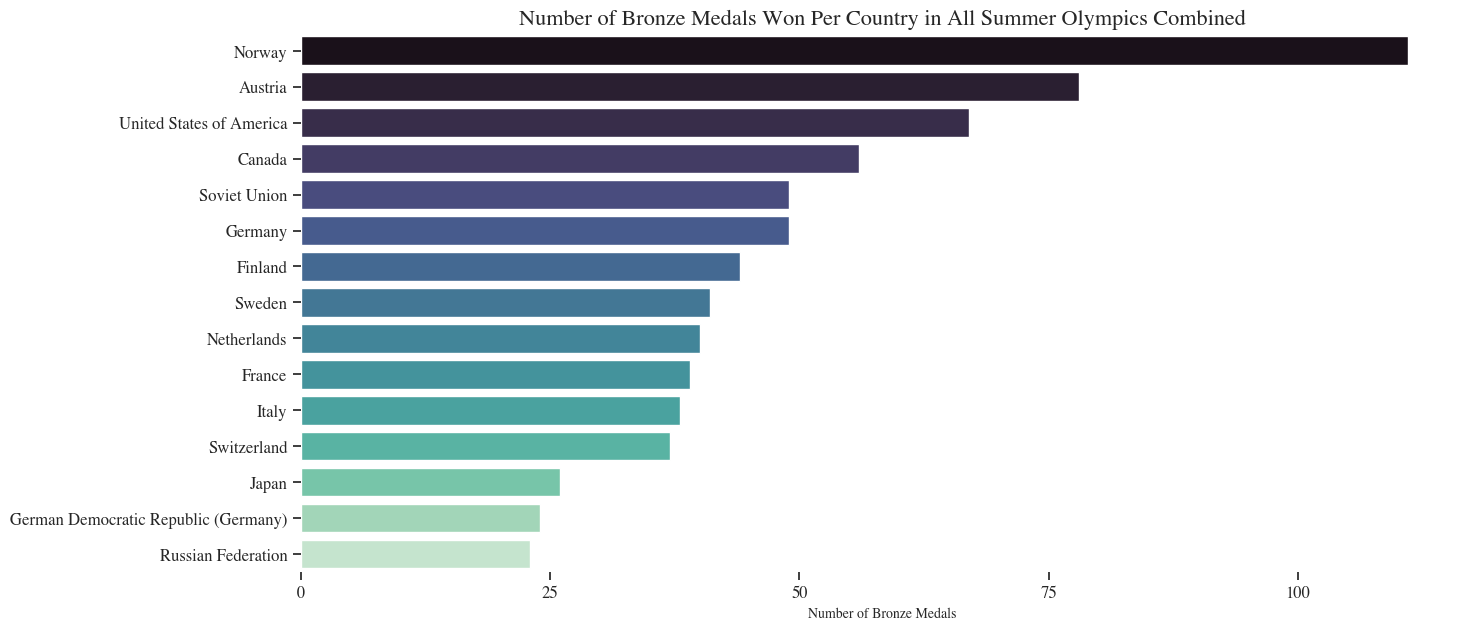

In [24]:
## SUMMER: Number of Bronze Medals per Country

### Actual Plot:
pf.plt.figure(figsize=(15,7))
pf.sns.barplot(TOPBronzePerCountryS, y="country", x="bronze_Medal_Count",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPBronzePerCountryS['bronze_Medal_Count'])+5,25))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Bronze Medals Won Per Country in All Summer Olympics Combined")
pf.plt.xlabel("Number of Bronze Medals")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

## plt.rc('font', size=SMALL_SIZE)          ## controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)      ## fontsize of the axes title
pf.plt.rc('axes', labelsize=SMALL_SIZE)       ## fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)     ## fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)    ## fontsize of the figure title

None

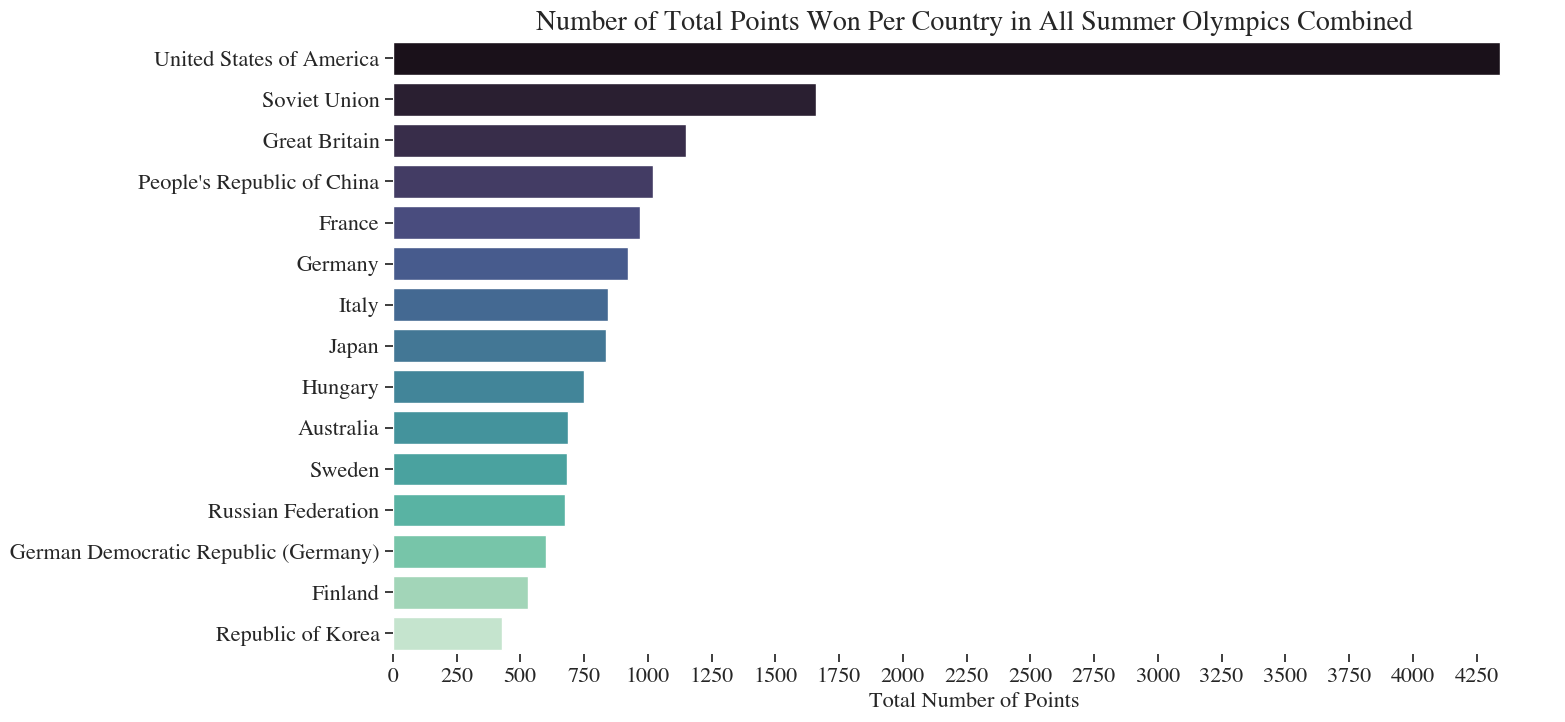

In [69]:
## SUMMER: Number of Total Points per Country

## Actual Plot:
pf.plt.figure(figsize=(15,8))
pf.sns.barplot(TOPTotalPointsCountryS, y="country", x="point_value",palette="mako")

## Edit the Plot:
pf.plt.xticks(pf.np.arange(0, max(TOPTotalPointsCountryS['point_value'])+100,250))
ax = pf.plt.gca()
ax.set_frame_on(False)

## Add Labels:
pf.plt.title("Number of Total Points Won Per Country in All Summer Olympics Combined")
pf.plt.xlabel("Total Number of Points")
pf.plt.ylabel(None)

## Change Font Style:
pf.plt.rcParams["font.family"] = "Times"

## Font Sizes:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

## plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
pf.plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
pf.plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pf.plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pf.plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pf.plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

pf.plt.savefig("../../images/cynthia_figures/summerEDA.png", bbox_inches='tight', dpi=100)
None

---

<h3 align="left">Milestone Three: Exploratory Data Analysis Conclusion (updated: 03-18-2023)</h3>

---

First, before I explain into my exploratory data analysis (EDA), I would like to specify that I am going to attend the project office hours to figure out a minor predicament I have encountered. It is minor and I can still produce the required expectations for Milestone 3, however, once my problem is resolved I will be able to develop more sophisticated EDA plots. EDA is supposed to be an insight to one's analysis which allows for basic predictions to be made and if errors such as violation assumptions are present within the data, EDA gives one a starting place to perform model adequacy and diagnostics. 

Second, I have a profound background in working research position for the majority of my university career thus far. This positions have included copious amount of work in various areas however I have spent a good portion of my time coding in R for my employers. Additionally, being in my 5th year of a combined degree of Statistics and Ecology, I have spent a lot of time on my course work coding. Overall, my experience in coding especially in R is significant and shouldn't be a set back on my behalf towards this project.

Third, I spent approximately 16 to 18 hours just on the data cleaning and wrangling for this milestone. For someone knowledgeable with how coding works, I continuously encountered error message after error message. There are also a handful of ideas I wanted to execute with my project, however I wasn't able to comprehend how to make the code operate functionally in Python, but I had a better idea how to do it in R. I know that my "three" plots are all the "same", however, they do provide a reasonable insight to the beginning of how I would like to conduct my analyses. In order to complete more complex and sophisticated plots, I am going to seek assistance from the project office hours to determine how to resolve a few temporary analyses steps and return a main dataframe that functions properly containing all the information I need for future analyses techniques. Furthermore, I had attempted to subset the plots beside each other but I wasn't able to figure out how to do as such. I was going to put the plot of "Number of Gold medals in all the Winter Olympics Combined" beside the plot of "Number of Gold medals in all the Summer Olympics Combined" to be able to do a comparison. I also thought about combining the plots onto one graph but also struggled to do as such.

Fourth, I think after completing a very basic EDA, the next step in my analyses plan would be to perform some EDA on how the data evolves as climate is added into the visualizations. Additionally, by looking into my initial EDA, I think I am going to include GDP into the analyses as well. From here, I am undecided of my approach of only looking at overall Summer versus Winter Olympics, or narrowing down the Summer and Winter Olympics to after 1988 due to country name changes. Or if I want to look at specific games from 2000 and above in the Summer and Winter Olympics. So compare the Olympics in pairs, for example compare Beijing 2022 (Winter) to Tokoyo 2020 (Summer). My "more complex" analyses ideals are a multiple linear regression with categorical variables that are Bernoulli distributed and thus numerical (Dummy/Categorical Regression) and relational plots.

Lastly, here is a summation of my findings: 

For the total points awarded to a country for the Olympics were exactly the same standings for the Summer and Winter Games. The standings were:
1. Norway
2. USA
3. Austria
4. Germany
5. Netherlands
6. Soviet Union
7. Canada
8. Sweden
9. Switerland
10. Finland

Due to the standings of total points awarded to a country being exactly the same between the Summer and Winter Olympics, I would suspect that a Binomial/Bernoulli designation of climate has little to no influence of how a country preforms. I would assume GDP has a more significant influence, however I still want to research what influence the average temperature has with winning medals at the Olympics.

For the total number of gold medals won by each country for the Winter and Summer Olympics are respectively: (Winter/Summer)
1. Norway/USA
2. USA/Soviet Union
3. Germany/People's Republic of China
4. Austria/Great Britain
5. Netherlands/Japan
6. Switzerland/Italy
7. Sweden/France
8. Soviet Union/Hungary
9. Canada/Germany
10. Finland/Russian Federation

The standings here are rather interesting! Few minor differences between the standings some countries repeated when comparing and some not in the other standing. I found it interesting for "Russia's" standings, the Soviet Union was approximately before 1988 and the Russian Federation was after, but both of these "countries" make the overall standing.

For the total number of silver medals won by each country for the Winter and Summer Olympics are respectively: (Winter/Summer)
1. Norway/USA
2. USA/Soviet Union
3. Austria/Great Britain
4. Germany/Germany
5. Netherlands/France
6. Canada/People's Republic of China
7. Finland/Italy
8. Soviet Union/Japan
9. France/Sweden
10. Sweden/Hungary

Once again, few minor differences but overall very interesting again.

**NEW:** For the total number of bronze medals won by each country for the Winter and Summer Olympics are respectively: (Winter/Summer)
1. Norway/USA
2. Austria/Soviet Union
3. USA/Great Britain
4. Canada/Germany
5. Soviet Union/France
6. Germany/Italy
7. Finland/Japan
8. Sweden/People's Republic of China
9. Netherlands/Australia
10. France/Sweden

Over the entirety of comparing medal standing of countries in the Olympics it appears that the standing usually contain similar if not the same countries. This is what makes me think that temperature does have as large of an impact as does GDP in the Olympics. However, I am still curious of the relationship that climate has with the success of countries winning at the Olympics.

---

<h3 align="left"> NEW: Milestone Four: Visualizations, Analysis, and Pipeline (updated: 03-18-2023)</h3>

---

#### Task 1: Set up an Analysis Pipeline
1. Load Data
2. Clean Data
3. Process Data
4. Wrangle Data
5. Exploratory Data Analysis (not required for this Task).
6. Data Analysis (not required for this Task).
7. Export reports/data analyses and visualizations (not required for this Task).

All of of the required steps of an analysis pipeline have been completed.

#### Task 2: Method Chaining and Writing Python Programs

Any method chaining that is obvious and easy to do has been completed. I would have completed additional method chaining, however I have other plans for these sections. For the sections that have ."groupby" parameters, I will be turning these code chunks into functions since I am theoretically copying and pasting each chunk over and over while only changing a few simple parameters. Additonally, when I complete my EDA I did the exact ideal of coding the same plot with slightly different parameters, thus this will also be turned into a function.  

I am unsure of whether my method chaining should be wrapped in a function, or create a more useful function else where that will be used instead of a method chain of ".drop()" and ".rename()" that is specific to each dataframe, whereas my ideal for the other functions would be more useful and timesaving. 

#### Task 3: Conduct your analysis to answer your research question

See below!! 

---

<h3 align="left"> Milestone Four: Analysis (updated: 03-23-2023)</h3>

---

<h3 align="left"> Winter Olympics Statistics: Analyses Section </h3>

---

In [26]:
## WINTER OLYMPICS STATISTICS:
WinterStatistics = pf.pd.merge(GoldPerCountry, SilverPerCountry, left_on='country', right_on='country', copy=False).merge(BronzePerCountry, on="country", copy=False).merge(TotalPointsCountry, on="country", copy=False).merge(GDPCountry1, on="country_code", copy=False).merge(HistTemp1, on="country_code")
WinterStatistics = WinterStatistics.drop(columns=['medal_type_x', 'medal_type_y', 'country_code_y','medal_type', 'country_code', 'country_y', 'country','hot_cold']).rename(columns = {'country_x': 'country', 'country_code_x': "country_code"})
WinterStatistics = WinterStatistics[0:16]

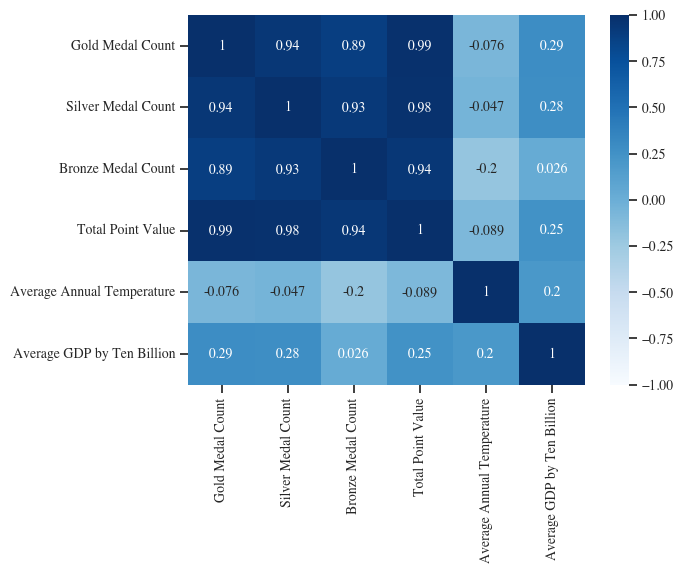

In [73]:
## WINTER OLYMPICS ANALYSES:
WinterStatisticsCorrPlot = WinterStatistics[['gold_Medal_Count', 'silver_Medal_Count', 
                                             'bronze_Medal_Count', 'point_value', 'Annual_temp',
                                             'average_GDP_ByTenBillion']]

WinterStatisticsCorrPlot= WinterStatisticsCorrPlot.rename(columns={'gold_Medal_Count': 'Gold Medal Count', 
                                         'silver_Medal_Count': 'Silver Medal Count',
                                         'bronze_Medal_Count':'Bronze Medal Count', 
                                         'point_value': "Total Point Value",
                                         'Annual_temp': 'Average Annual Temperature',
                                        'average_GDP_ByTenBillion': 'Average GDP by Ten Billion'})

WinterCorrPlot = pf.sns.heatmap(WinterStatisticsCorrPlot.corr(),vmin=-1, vmax=1, annot=True,cmap="Blues")

## Font Sizes:

SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterCorrEDA.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Correlation Plot:

When comparing the parameters of the Winter Olympics Statistics data frame, focusing on the average annual temperature and average GDP, the correlation plot yields some interesting results. As we compare the correlation of average annual temperature across the three different medal counts and the total point value, the overall correlation is approximate zero meaning there is not a strong correlation between these factors. However, As we compare the correlation of average annual temperature across the three different medal counts and the total point value, the overall correlation is approximately 0.2 with the exception of the bronze medal count. This plot provides the interpretion that there's little to no correlation of temperature in response tot he scoring parameters. Whereas, average GDP has a slight positive correlation. A positive correlation refers to as one parameter increases the other parameter increases, and vise versa when one parameter decreases the other parameter decreases. From this plot, I would predict in my regression plots that annual temperature is not going to have a strong relationship and nor will GDP. 

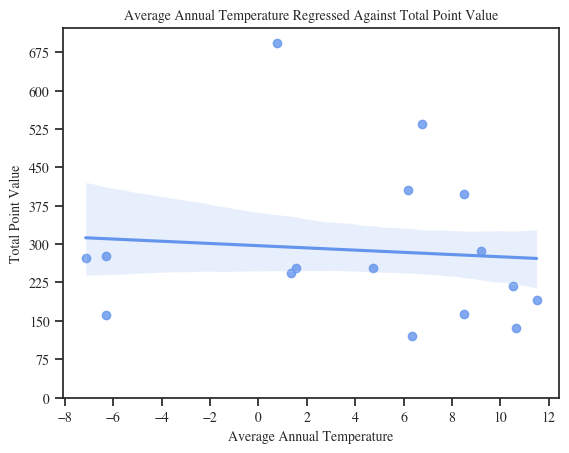

In [74]:
## WINTER OLYMPICS ANALYSES:
ClimatePlot1 = pf.sns.regplot(x="Annual_temp", y="point_value", data=WinterStatistics, color='cornflowerblue',ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(WinterStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['point_value'])+50,75))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Total Point Value")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Total Point Value")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterClim1.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Temperature against Point Value

From this regression plot above, I observe a very slight negative slope. However, there appears to be no pattern with as average temperature either increases or decreases the total point value does not seem to increase or decrease. From this plot, I would not even go to the length of stating as the average annual temperature increases the total point value decreases for a country. Ultimately, here I say there is little to no relationship between temperature and point value. Additionally, this coheres with the correlation plot.

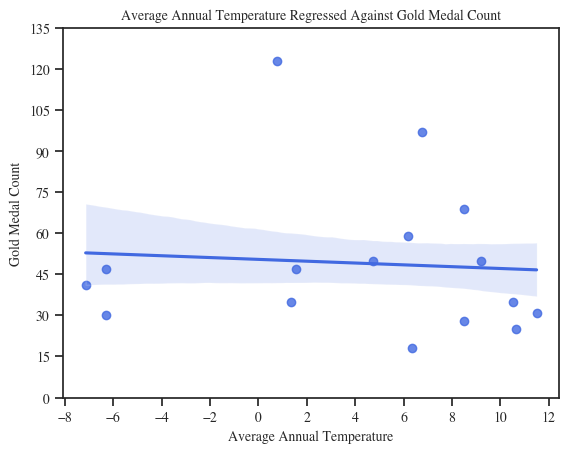

In [75]:
## WINTER OLYMPICS ANALYSES:
ClimatePlot2 = pf.sns.regplot(x="Annual_temp", y="gold_Medal_Count", data=WinterStatistics, color='royalblue',ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(WinterStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['gold_Medal_Count'])+25,15))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Gold Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Gold Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterClim2.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Temperature against Gold Medal Count

As explained in the above plot, there is really no significant linear relationship being represented in this plot. The countries that are winning the most gold medals in the winter olympics are sporadic and no real pattern. With the Olympic data, specifically for the winter Olympic, Norway and the United States of America are the two outliers on the plot. These two countries plus Germany has the most gold medals won and all have rather different average annual temperature. If my research question were to be yes, that temperature has an influence on a countries success then the lower average temperature countries would be winning more often and we would have a negative slope. So as average temperature increases, the points or medals awards decreases. However this is not the case... The relationship is very very very slightly negative...

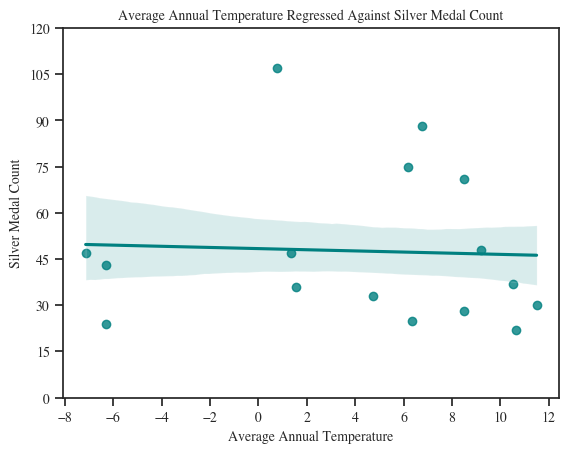

In [76]:
## WINTER OLYMPICS ANALYSES:
ClimatePlot3 = pf.sns.regplot(x="Annual_temp", y="silver_Medal_Count", data=WinterStatistics, color="teal", ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(WinterStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['silver_Medal_Count'])+25,15))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Silver Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Silver Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterClim3.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Temperature against Silver Medal Count

Once again, the same commentary can be made from the gold medal count regressed against temperature. Same ideal, just different medal type. 

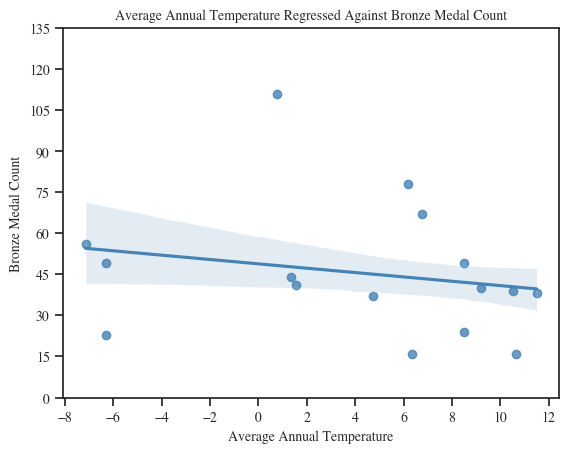

In [77]:
## WINTER OLYMPICS ANALYSES:
ClimatePlot4 = pf.sns.regplot(x="Annual_temp", y="bronze_Medal_Count", data=WinterStatistics, color="steelblue", ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(WinterStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['bronze_Medal_Count'])+25,15))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Bronze Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Bronze Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterClim4.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Temperature against Bronze Medal Count

Once again, the same commentary can be made as above. The bronze medal regressed against temperature has a slightly more negative relationship but I still would not denote this as temperature having a significant effect on a countries success in the winter Olympics. All of these regression plots have a highlighted confidence interval of 75%. Typically, I would use a 90-95% interval but 75% was best suited due to the variablity in my data.

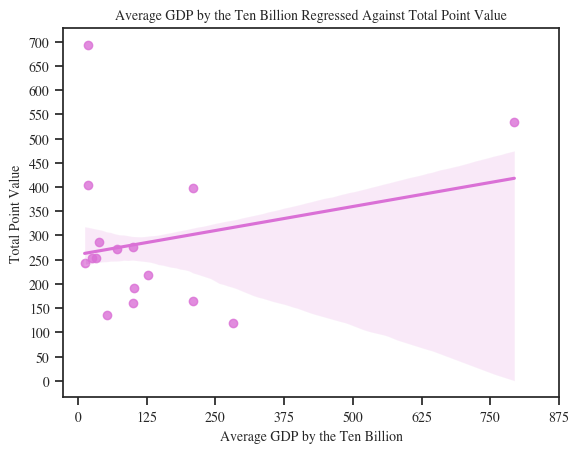

In [78]:
## WINTER OLYMPICS ANALYSES:
GDPPlot1 = pf.sns.regplot(x="average_GDP_ByTenBillion", y="point_value", data=WinterStatistics, ci=50, color='orchid')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(WinterStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['point_value'])+25,50))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Total Point Value")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Total Point Value")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterGDP1.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Gross Domestic Product against Total Point Value

Here these linear regression plots change slightly. Now the average GDP is being regressed against different parameters, and in this plot it is specifically the total point value. From the plot, you instantly notice the two outliers. The outlier with the high medal count but lower GDP is Norway, and the second highest medal count with highest GDP is the USA. This regression plot shows a slightly positive linear relationship, meaning where as average GDP increases so does the total point value. However, by observing the plot, I would personally say there is more of a relationship with GDP than temperature but overall with fewer points I don't think any conclusions can be confidently drawn. Some countries have a higher GDP but have overall less points, and some lower GDP have higher point totals. Due to the variance being EXTREMELY high I have set the highlighted confidence interval bar to be only at 50%, otherwise the plot gets really wonky, really quickly. (AKA, you start forcing the plot to have negative point values which is impossible)

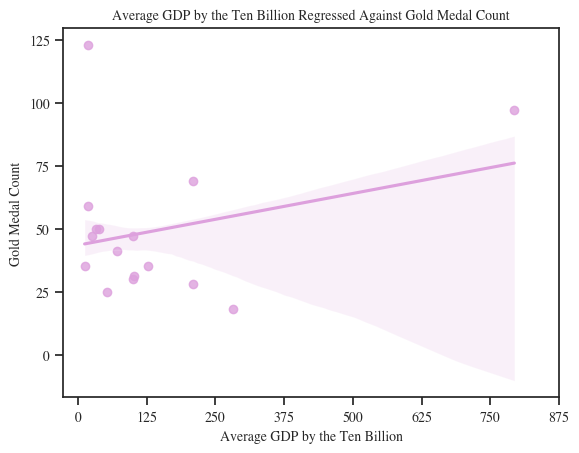

In [79]:
## WINTER OLYMPICS ANALYSES:
GDPPlot2 = pf.sns.regplot(x="average_GDP_ByTenBillion", y="gold_Medal_Count", data=WinterStatistics, ci=50, color='plum')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(WinterStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['gold_Medal_Count'])+25,25))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Gold Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Gold Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterGDP2.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Average GDP against Gold Medal Count
Once again, same commentary can be said but there appears to be more of a significant positive linear relationship. However, this may be due to variance in the average GDP per country.

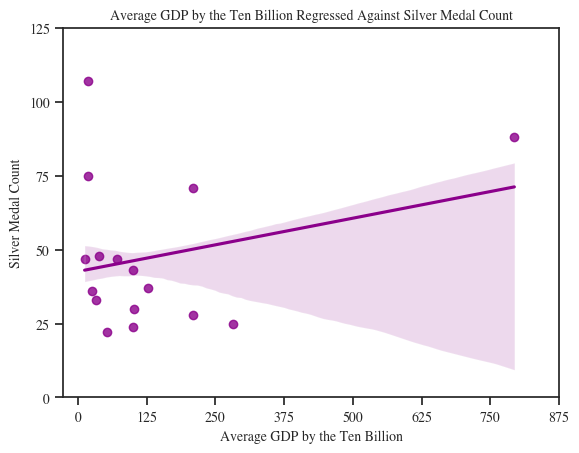

In [80]:
## WINTER OLYMPICS ANALYSES:
GDPPlot3 = pf.sns.regplot(x="average_GDP_ByTenBillion", y="silver_Medal_Count", data=WinterStatistics, ci=50, color='darkmagenta')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(WinterStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['silver_Medal_Count'])+25,25))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Silver Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Silver Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterGDP3.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Average GDP against Silver Medal Count
Once again, same commentary can be specified. There is a lot of variablilty within the number of medals won and GDP between the 1 * ten billion and 250 * ten billion.

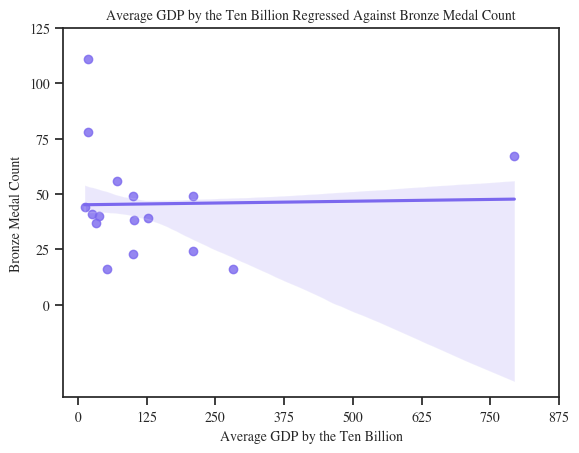

In [81]:
## WINTER OLYMPICS ANALYSES:
GDPPlot4 = pf.sns.regplot(x="average_GDP_ByTenBillion", y="bronze_Medal_Count", data=WinterStatistics, ci=50, color='mediumslateblue')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(WinterStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(WinterStatistics['bronze_Medal_Count'])+25,25))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Bronze Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Bronze Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/winterGDP4.png", bbox_inches='tight', dpi=100)
None

##### Winter Olympics Regression Plots: Average GDP against Gold Medal Count
This plot had me a bit surprised due to the regression line is barely positive or increasing. This peaked my interests and got me curious how the proportions of the medals were distributed. Is there a greater variance between countries and the number of gold and silver medals they win in comparison to bronze? This sparked another quick research question to observe the proportional differences between the three difference medal counts. Overall, in this plot there is not an obvious relationship between GDP and winning bronze medals.

In [82]:
## WINTER: Medal Proportions

## Medal Point Values:
WinterStatistics['gold_point_value'] = WinterStatistics['gold_Medal_Count']*3
WinterStatistics['silver_point_value'] = WinterStatistics['silver_Medal_Count']*2
WinterStatistics['bronze_point_value'] = WinterStatistics['bronze_Medal_Count']*1

## Proportion Values:
WinterStatistics['prop_gold'] = WinterStatistics['gold_point_value'] / WinterStatistics['point_value']
WinterStatistics['prop_silver'] = WinterStatistics['silver_point_value'] / WinterStatistics['point_value']
WinterStatistics['prop_bronze'] = WinterStatistics['bronze_point_value'] / WinterStatistics['point_value']

Text(0, 0.5, '')

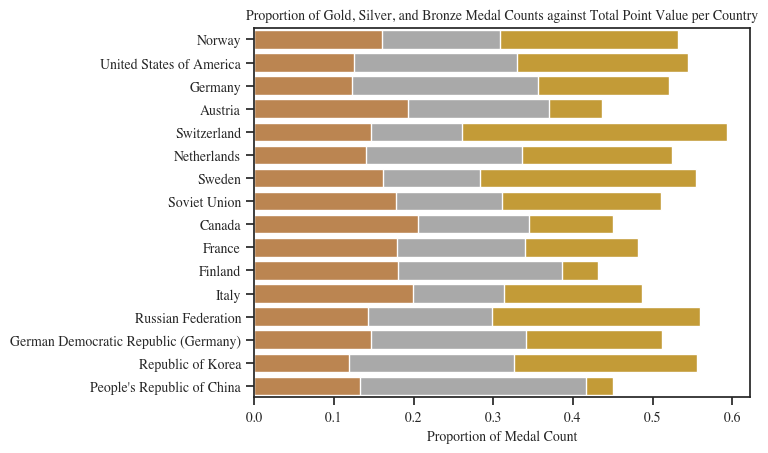

In [83]:
## MEDAL PROPORTIONS PLOT:
WinterPropPlot1 = pf.sns.barplot(data=WinterStatistics, x='prop_gold', y='country', color='goldenrod')
WinterPropPlot2 = pf.sns.barplot(data=WinterStatistics, x='prop_silver', y='country', color='darkgray')
WinterPropPlot3 = pf.sns.barplot(data=WinterStatistics, x='prop_bronze', y='country', color='peru')

## Add Labels:
pf.plt.title("Proportion of Gold, Silver, and Bronze Medal Counts against Total Point Value per Country")
pf.plt.xlabel("Proportion of Medal Count")
pf.plt.ylabel(None)

##### Proportional Relationship of Medal Counts:
At first, this plot may be slighly confusing to interpret, however after some brief background on the plot which would be usually found in the figure description. To make for an easier understanding, the bars are colour coated on the plot. The yellow/gold bars represent the proportion of the total gold medal points divided by the overall point total per country. The gray/silver bars represent the proportion of the total silver medal points divided by the overall point total per country. The orange/bronze represent the proportion of the total bronze medal points divided by the overall point total per country. The gold bar extends from zero all the way to where the gold extends to the right, so where the gold bar extends to the right fully is the total proportion relative to gold. This is the same for the silver and bronze bars as well. Ultimately, I have overlayed the three medal proportions on top of each other thus the proportions can be compared. It appears that the gold and silver proportions have a significant amount of variation, whereas the bronze has less variation. Thus meaning the number of gold and silver points awards are more different whereas bronze points are more similar than one another.

---

<h3 align="left"> Summer Olympics Statistics: Analyses Section</h3>

---

In [84]:
## SUMMER OLYMPIC STATISTICS:
SummerStatistics = pf.pd.merge(GoldPerCountryS, SilverPerCountryS, left_on='country', right_on='country', copy=False).merge(BronzePerCountryS, on="country", copy=False).merge(TotalPointsCountryS, on="country", copy=False).merge(GDPCountry1, on="country_code", copy=False).merge(HistTemp1, on="country_code")
SummerStatistics = SummerStatistics.drop(columns=['medal_type_x', 'medal_type_y', 'country_code_y','medal_type', 'country_code', 'country_y', 'country','hot_cold']).rename(columns = {'country_x': 'country', 'country_code_x': "country_code"})
SummerStatistics = SummerStatistics[0:16]

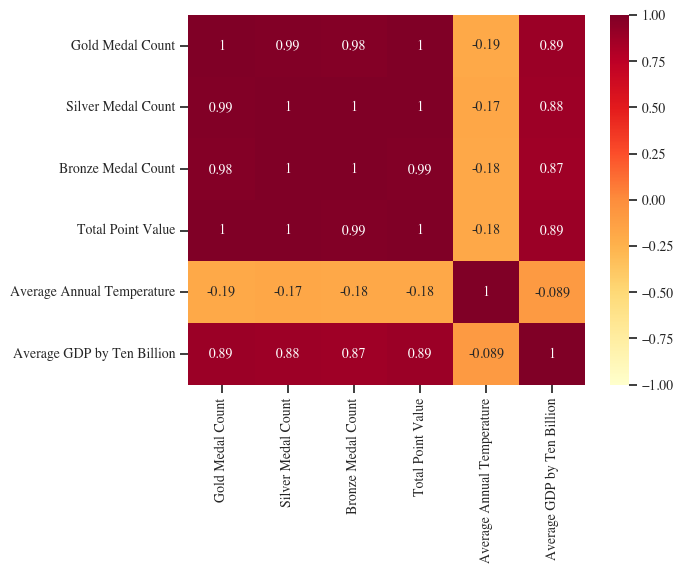

In [85]:
## SUMMER OLYMPICS ANALYSES:
SummerStatisticsCorrPlot = SummerStatistics[['gold_Medal_Count', 'silver_Medal_Count', 
                                             'bronze_Medal_Count', 'point_value', 'Annual_temp',
                                            'average_GDP_ByTenBillion']]

SummerStatisticsCorrPlot= SummerStatisticsCorrPlot.rename(columns={'gold_Medal_Count': 'Gold Medal Count', 
                                         'silver_Medal_Count': 'Silver Medal Count',
                                         'bronze_Medal_Count':'Bronze Medal Count', 
                                         'point_value': "Total Point Value",
                                         'Annual_temp': 'Average Annual Temperature',
                                        'average_GDP_ByTenBillion': 'Average GDP by Ten Billion'})

SummerCorrPlot = pf.sns.heatmap(SummerStatisticsCorrPlot.corr(),vmin=-1, vmax=1, annot=True,cmap="YlOrRd")

pf.plt.savefig("../../images/cynthia_figures/summerCorrEDA.png", bbox_inches='tight', dpi=100)

##### Summer Olympics Correlation Plot:

This plot can be explained much like the winter Olympics correlation plot way above, however there is an interesting difference between the two. In the winter Olympics correlation plot, the average annual temperature has little to no correlation, whereas average GDP had a mild positive correlation at approximately 0.2. For the above correlation plot for the summer Olympics yields approximately the same result for average temperature. However, average GDP has a strong positive correlation with the number of medals won and the total point value per country. This means as one of these parameters increases so does the other, or as one parameter decreases so does the other. This correlation plot seems more promising to yield some significant results regarding average GDP. Once again, I don't think the temperature is going to have any significant effect on a countries success. 

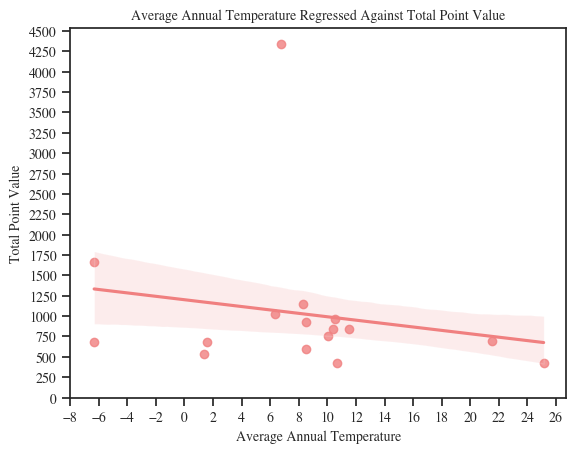

In [86]:
## WINTER OLYMPICS ANALYSES:
ClimatePlot1S = pf.sns.regplot(x="Annual_temp", y="point_value", data=SummerStatistics, color='lightcoral',ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(SummerStatistics['Annual_temp'])+2,2))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['point_value'])+250,250))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Total Point Value")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Total Point Value")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerClim1.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Temperature against Point Value

Firstly, I am not giving to dive as in depth with these plots since they yield similar results as the winter Olympics. There appears to be a slighly negative linear relationship. It appears that as as average annual temperature increases for a countru the less total point value you they have over time. However, there are exceptions on the plot, but overall I would say that there isn't a significant relationship presented on the plot above. If this was a statistics course I would dive into the more advance model adequency and diagnostics of regression, however since it is an introduction to data analytics I have decided to keep it simple. I think this plot shows a better relationship than the winter Olympics ones though.

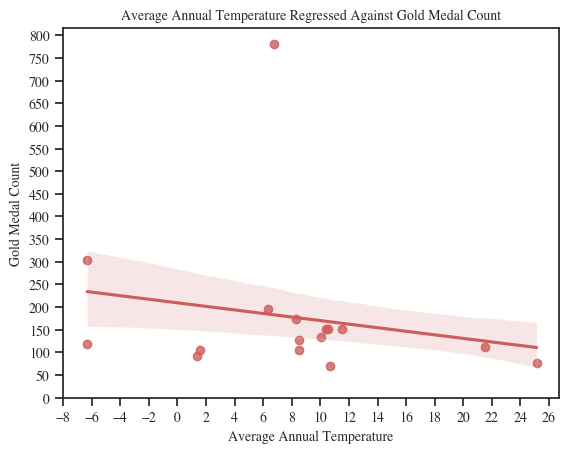

In [87]:
## SUMMER OLYMPICS ANALYSES:
ClimatePlot2S = pf.sns.regplot(x="Annual_temp", y="gold_Medal_Count", data=SummerStatistics, color='indianred',ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(SummerStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['gold_Medal_Count'])+25,50))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Gold Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Gold Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerClim2.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Temperature against Gold Medal Count

Once again, slightly negative linear relationship but overall the points do not show a signifciant relationship. If I had plotted more points, I maybe would be able to determine if the relationship was more significant or not or if there is multicollinearity associated with the data. 

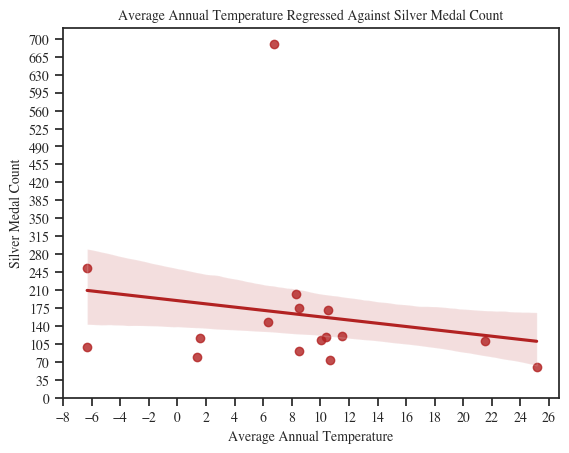

In [88]:
## SUMMER OLYMPICS ANALYSES:
ClimatePlot3S = pf.sns.regplot(x="Annual_temp", y="silver_Medal_Count", data=SummerStatistics, color="firebrick", ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(SummerStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['silver_Medal_Count'])+25,35))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Silver Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Silver Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerClim3.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Temperature against Silver Medal Count

Once again, a slight negative linear relationship. 

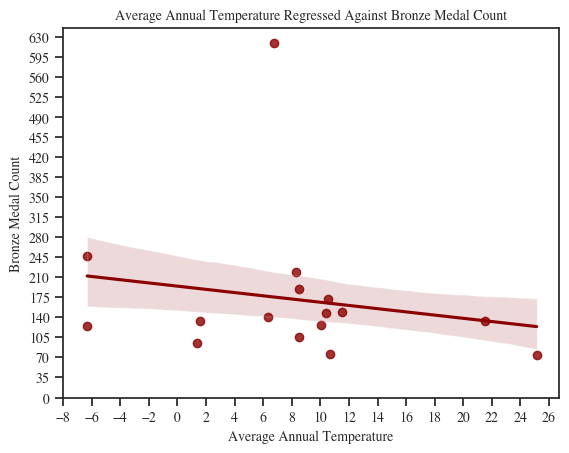

In [89]:
## SUMMER OLYMPICS ANALYSES:
ClimatePlot4S = pf.sns.regplot(x="Annual_temp", y="bronze_Medal_Count", data=SummerStatistics, color="darkred", ci=75)

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(-8, max(SummerStatistics['Annual_temp'])+1,2))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['bronze_Medal_Count'])+25,35))

## Add Labels:
pf.plt.title("Average Annual Temperature Regressed Against Bronze Medal Count")
pf.plt.xlabel("Average Annual Temperature")
pf.plt.ylabel("Bronze Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE)

pf.plt.savefig("../../images/cynthia_figures/summerClim4.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Temperature against Bronze Medal Count

Once again, a slight negative linear relationship.

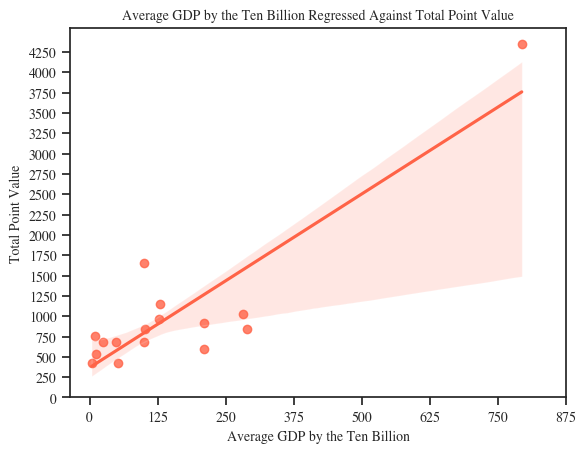

In [90]:
## SUMMER OLYMPICS ANALYSES:
GDPPlot1S = pf.sns.regplot(x="average_GDP_ByTenBillion", y="point_value", data=SummerStatistics, ci=75, color='tomato')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(SummerStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['point_value'])+125,250))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Total Point Value")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Total Point Value")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerGDP1.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Average GDP against Point Value

This is where the regression analysis gets more interesting. There appears to be a significant positive linear relationship of average GDP with total point value per country. Thus meaning that as the average GDP increases so does the total point value per country. This plot yields very different results in comparison to the winter Olympics and makes me ask "why?".
How come average GDP has a positive linear relationship with total point values in the summer Olympics but not the winter ones? Is it because of the popularity of sports in the winter versus summer Olympics? Are there more sports in the winter or summer Olympics? Is there some benefit by performing better in the summer Olympics? There is a whole plethora of questions that make me ask why this relationship is present here but not in the winter Olympics.

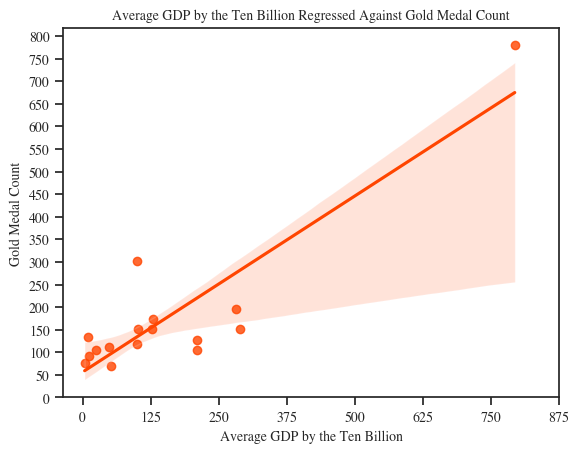

In [91]:
## SUMMER OLYMPICS ANALYSES:
GDPPlot2S = pf.sns.regplot(x="average_GDP_ByTenBillion", y="gold_Medal_Count", data=SummerStatistics, ci=75, color='orangered')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(SummerStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['gold_Medal_Count'])+25,50))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Gold Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Gold Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerGDP2.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Average GDP against Gold Medal Count

Once again, a fairly strong positive linear relationship. Quite interesting. 

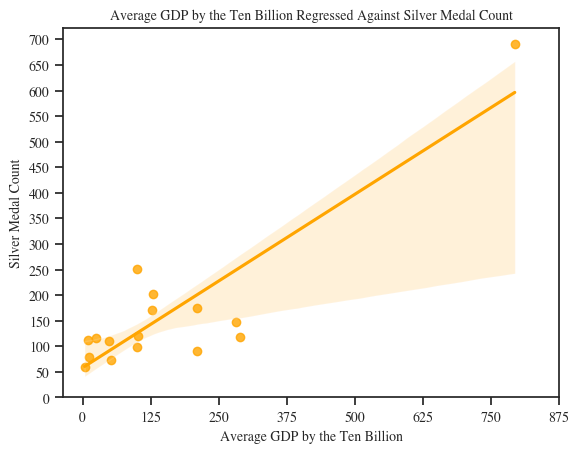

In [92]:
## SUMMER OLYMPICS ANALYSES:
GDPPlot3S = pf.sns.regplot(x="average_GDP_ByTenBillion", y="silver_Medal_Count", data=SummerStatistics, ci=75, color='orange')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(SummerStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['silver_Medal_Count'])+25,50))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Silver Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Silver Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerGDP3.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Average GDP against Silver Medal Count

Once again, another very significant positive linear relationship.

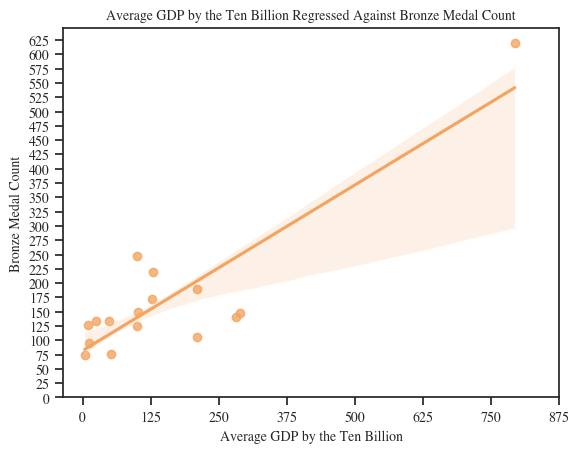

In [93]:
## SUMMER OLYMPICS ANALYSES:
GDPPlot4S = pf.sns.regplot(x="average_GDP_ByTenBillion", y="bronze_Medal_Count", data=SummerStatistics, ci=50, color='sandybrown')

## Edit the X/Y Tick Marks:
pf.plt.xticks(pf.np.arange(0, max(SummerStatistics['average_GDP_ByTenBillion'])+150,125))
pf.plt.yticks(pf.np.arange(0, max(SummerStatistics['bronze_Medal_Count'])+25,25))

## Add Labels:
pf.plt.title("Average GDP by the Ten Billion Regressed Against Bronze Medal Count")
pf.plt.xlabel("Average GDP by the Ten Billion")
pf.plt.ylabel("Bronze Medal Count")

## Font Sizes:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
pf.plt.rc('font', size=SMALL_SIZE)
pf.plt.rc('figure', titlesize=MEDIUM_SIZE)
pf.plt.rc('axes', titlesize=SMALL_SIZE)    
pf.plt.rc('axes', labelsize=SMALL_SIZE)    
pf.plt.rc('xtick', labelsize=SMALL_SIZE)   
pf.plt.rc('ytick', labelsize=SMALL_SIZE) 

pf.plt.savefig("../../images/cynthia_figures/summerGDP4.png", bbox_inches='tight', dpi=100)
None

##### Summer Olympics Regression Plots: Average GDP against Bronze Medal Count
Once again, all three of the unique medal counts are a positive linear relationship.

In [48]:
## SUMMER: Medal Proportions

## Medal Point Values:
SummerStatistics['gold_point_value'] = SummerStatistics['gold_Medal_Count']*3
SummerStatistics['silver_point_value'] = SummerStatistics['silver_Medal_Count']*2
SummerStatistics['bronze_point_value'] = SummerStatistics['bronze_Medal_Count']*1

## Proportion Values:
SummerStatistics['prop_gold'] = SummerStatistics['gold_point_value'] / SummerStatistics['point_value']
SummerStatistics['prop_silver'] = SummerStatistics['silver_point_value'] / SummerStatistics['point_value']
SummerStatistics['prop_bronze'] = SummerStatistics['bronze_point_value'] / SummerStatistics['point_value']

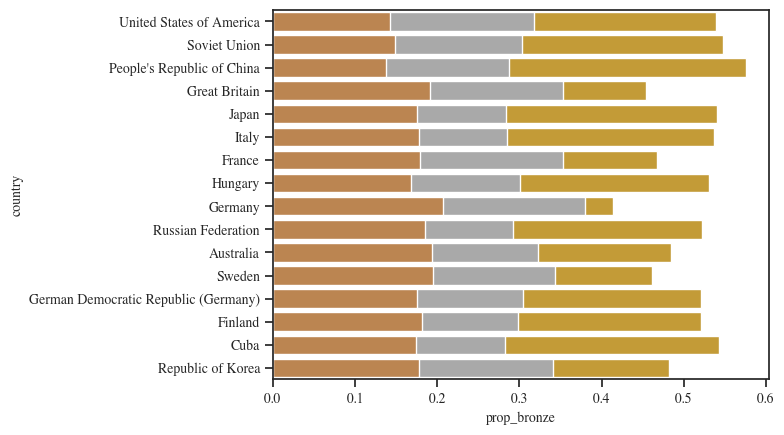

In [49]:
## MEDAL PROPORTIONS PLOT:
SummerPropPlot1 = pf.sns.barplot(data=SummerStatistics, x='prop_gold', y='country', color='goldenrod')
SummerPropPlot2 = pf.sns.barplot(data=SummerStatistics, x='prop_silver', y='country', color='darkgray')
SummerPropPlot3 = pf.sns.barplot(data=SummerStatistics, x='prop_bronze', y='country', color='peru')

##### Proportional Relationship of Medal Counts:
At first, this plot may be slighly confusing to interpret, however after some brief background on the plot which would be usually found in the figure description. To make for an easier understanding, the bars are colour coated on the plot. The yellow/gold bars represent the proportion of the total gold medal points divided by the overall point total per country. The gray/silver bars represent the proportion of the total silver medal points divided by the overall point total per country. The orange/bronze represent the proportion of the total bronze medal points divided by the overall point total per country. The gold bar extends from zero all the way to where the gold extends to the right, so where the gold bar extends to the right fully is the total proportion relative to gold. This is the same for the silver and bronze bars as well. Ultimately, I have overlayed the three medal proportions on top of each other thus the proportions can be compared. It appears that the gold and silver proportions have a significant amount of variation, whereas the bronze has less variation. Thus meaning the number of gold and silver points awards are more different whereas bronze points are more similar than one another.

---

<h3 align="left"> Milestone 4: Overall Conclusion</h3>

---

Overall, for the winter Olympics, does the average annual temperature have an influence on a countries success rate? Honestly, probably not. By doing a simplistic analyses there doesn't seem to be a significant relationship of performing better in the winter Olympics when your countries annual average temperature is colder. Since temperature did not seem to be a significant influence, while analyzing average GDP relative to a countries performance also did not yield significant results. The relationships discovered were intriguing, but ultimately leads me to say that winning individual events at the Olympic is not necessarily dependent on a countries averge GDP or temperature however it may have external influences. If a countries average GDP is higher, more money may be invested into the Olympics and more money may be invested into the countries higher athletic designations. Additionally, if you live in a colder climate country you may be more likely to choose a winter Olympic sport to specialize in but that does not guarentee your performance at the Olympics is more successful. Honestly, I think the success of a country is dependent on soley on the success of the athletes that are sent to perform. Yes, more money allows for more time and more resources to be dedicated to the sport, however mindset and motivation also influences an athletic drastically.

Overall, for the summer Olympics, the average annual temperature once again did not seem to yield significant results to form a relationship. However, average GDP produce some interesting results. For the summer Olympics it seems that there was a significant positive linear relationship between the success of a country depicted by the total points per country summed over all the summer Olmypics ever. This means that as the GDP of a country increases the success of a country also increases. This may not neccesarily be true for all the countries that perform in the Olympics, however for the top 15 performing countries this seems to be true. 

---

<h3 align="left"> Milestone Five: Processing Data (updated: 04-03-2023)</h3>

---

In [56]:
## PROCESS DATA:

WinterOlympic.to_csv("../../data/processed/CK_WinterOlympic.csv", index=False)
SummerOlympic.to_csv("../../data/processed/CK_SummerOlympic.csv", index=False)
WinterStatistics.to_csv("../../data/processed/CK_WinterStatistics.csv", index=False)
SummerStatistics.to_csv("../../data/processed/CK_SummerStatistics.csv", index=False)

TOPGoldPerCountry.to_csv("../../data/processed/CK_GoldPerCountryW.csv", index=False)
TOPSilverPerCountry.to_csv("../../data/processed/CK_SilverPerCountryW.csv", index=False)
TOPBronzePerCountry.to_csv("../../data/processed/CK_BronzePerCountryW.csv", index=False)
TOPTotalPointsCountry.to_csv("../../data/processed/CK_TotalPointsPerCountryW.csv", index=False)

TOPGoldPerCountryS.to_csv("../../data/processed/CK_GoldPerCountryS.csv", index=False)
TOPSilverPerCountryS.to_csv("../../data/processed/CK_SilverPerCountryS.csv", index=False)
TOPBronzePerCountryS.to_csv("../../data/processed/CK_BronzePerCountryS.csv", index=False)
TOPTotalPointsCountryS.to_csv("../../data/processed/CK_TotalPointsPerCountryS.csv", index=False)

## .to_csv('', index=False)
## pd.read_csv('')

---